# Gráficos de Distribución


Vamos a ver algunas formas de Gráficar la distribución de nuestra data:


**Gráficos**
* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Librerias

In [4]:
import seaborn as sns

## Data
Seaborn viene con Data sets

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot
Muestra la distribución de data univariada.

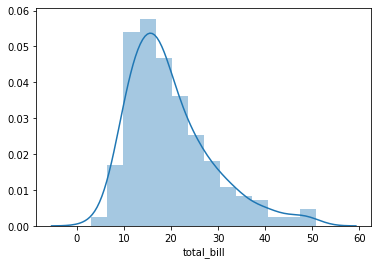

In [7]:
sns.distplot(tips['total_bill'])

To remove the kde layer and just have the histogram use:

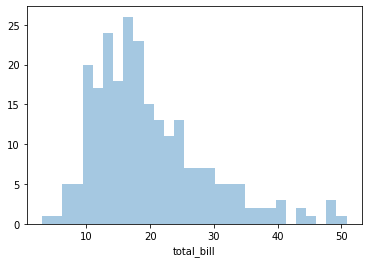

In [14]:
sns.distplot(tips["total_bill"],kde=False,bins=30)

## jointplot

Joinplot() nos muestra la distribución de data bivariada. Con la selección de Kind podemos elegir:
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

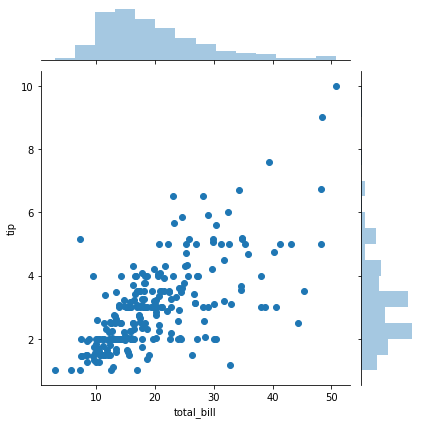

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

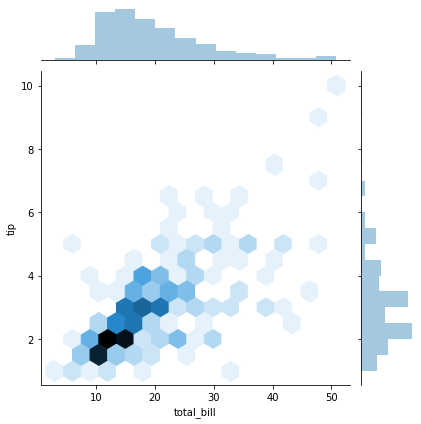

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

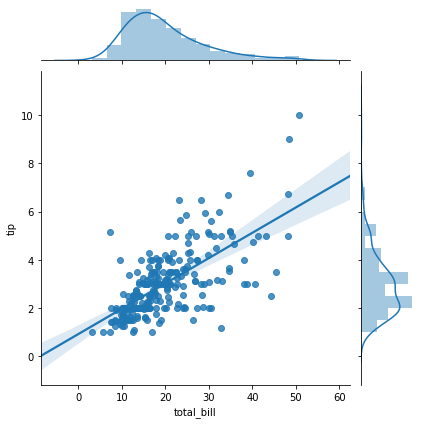

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot nos permite ver relaciones entre variables a pares de todo un data set (columnas numericas) y permite usar hue como argumento para variables categoricas. 

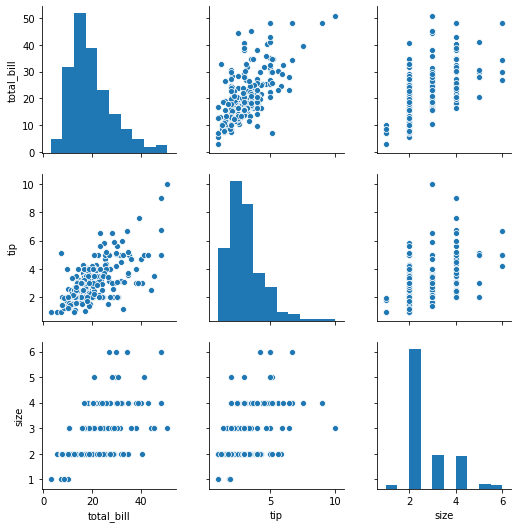

In [15]:
sns.pairplot(tips)

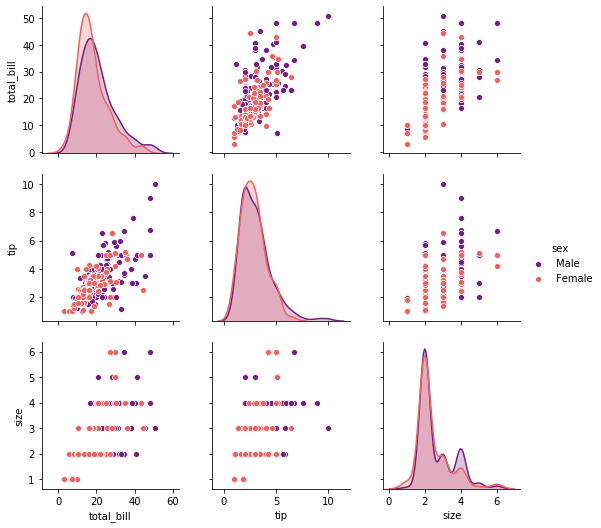

In [17]:
sns.pairplot(tips,hue='sex',palette='magma')

Para ver mas palette: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## kdeplot

Kde plots o Kernel Density Estimations Plots. Estos Gráficos reemplazan cada observación con una distribución Gauss (Normal) centrada al rededor de esta. 

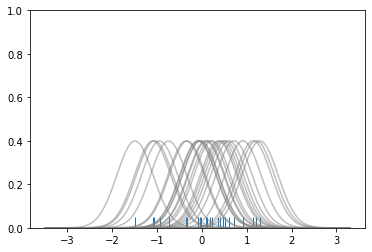

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)

sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)


url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


kernel_list = []

for data_point in dataset:
    
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1);

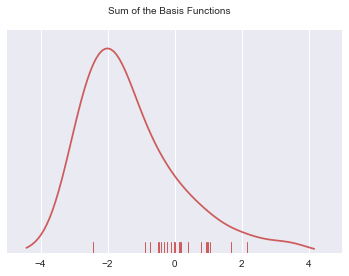

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

Con nuestro data set tip:

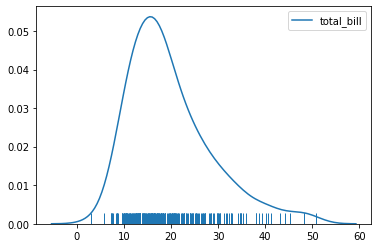

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])